In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
# import warnings
# warnings.filterwarnings("ignore")

import os
import time
import sys
import pprint

In [66]:
train_df = pd.read_csv("Input/application_train.csv")

In [67]:
print(train_df .columns.values)

['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRANCES_AVG' 'FLOOR

In [68]:
train_df .shape

(307511, 122)

In [69]:
train_df .dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [70]:
train_df .DAYS_BIRTH

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
5        -16941
6        -13778
7        -18850
8        -20099
9        -14469
10       -10197
11       -20417
12       -13439
13       -14086
14       -14583
15        -8728
16       -12931
17        -9776
18       -17718
19       -11348
20       -18252
21       -14815
22       -11146
23       -24827
24       -11286
25       -19334
26       -18724
27       -15948
28        -9994
29       -10341
          ...  
307481   -20644
307482   -14106
307483   -24911
307484   -12847
307485   -11973
307486   -16010
307487   -23125
307488   -10092
307489   -16471
307490    -9874
307491   -10976
307492   -20965
307493   -17533
307494   -14958
307495   -20922
307496   -17345
307497   -16679
307498   -19102
307499   -16988
307500   -20390
307501   -12961
307502   -16063
307503   -11870
307504   -16705
307505   -24384
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length

In [71]:
def convertAge(age):
    age = int((age - (age * 2))/365)
    return age
# df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(convertAge)

In [72]:
train_df ['AGE'] = train_df ['DAYS_BIRTH'].apply(convertAge)

In [73]:
del train_df['DAYS_BIRTH']

In [74]:
train_df .head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54


In [75]:
train_df .describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,63815.045904,-4986.120328,...,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,43.435968
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,141275.766519,3522.886321,...,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,11.954593
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-2760.000000,-7479.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-1213.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-289.000000,-2010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,365243.000000,0.000000,...,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.000000


### 1. Exploration and Data Cleansing
##### PassengerID is not usable for machine leanin. Same with Name. Let's drop these.

In [76]:
train_df .drop(["FLAG_PHONE", "FLAG_EMAIL"], inplace=True, axis=1)

In [77]:
train_df .head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52


#not necessary
df.dtypes.reset_index(inplace=True)

In [78]:
train_df .head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54


In [79]:
cat_cols = [
    "AMT_INCOME_TOTAL",
    "CODE_GENDER",
    "NAME_INCOME_TYPE",
    "AGE"
]

In [80]:
num_cols = [
    
    "CNT_FAM_MEMBERS",
    "CNT_CHILDREN",
    "DAYS_ID_PUBLISH",
    "DAYS_EMPLOYED",
    "FLAG_EMP_PHONE",
    "CNT_FAM_MEMBERS",
   
    "DAYS_REGISTRATION"
]

In [81]:
for col in cat_cols:
    print(col, len(train_df.loc[train_df[col].isna()]))

AMT_INCOME_TOTAL 0
CODE_GENDER 0
NAME_INCOME_TYPE 0
AGE 0


In [82]:

del train_df["AMT_GOODS_PRICE"]

In [83]:



cat_cols = [
    "FLAG_DOCUMENT_2",
    "FLAG_DOCUMENT_3",
    "FLAG_DOCUMENT_4",
    "FLAG_DOCUMENT_5",
    "FLAG_DOCUMENT_5",
    "FLAG_DOCUMENT_6",
    "FLAG_DOCUMENT_7",
    "FLAG_DOCUMENT_8",
    "FLAG_DOCUMENT_9",
    "FLAG_DOCUMENT_10"
]

In [84]:
num_cols = [
    "FLAG_DOCUMENT_11",
    "FLAG_DOCUMENT_12",
    "FLAG_DOCUMENT_13",
    "FLAG_DOCUMENT_14",
    "FLAG_DOCUMENT_15",
    "FLAG_DOCUMENT_16",
    "FLAG_DOCUMENT_17",
    "FLAG_DOCUMENT_18",
    "FLAG_DOCUMENT_19",
    "FLAG_DOCUMENT_20",
    "FLAG_DOCUMENT_21"
]

In [85]:
for col in num_cols:
    print(col, len(train_df.loc[train_df[col].isna()]))

FLAG_DOCUMENT_11 0
FLAG_DOCUMENT_12 0
FLAG_DOCUMENT_13 0
FLAG_DOCUMENT_14 0
FLAG_DOCUMENT_15 0
FLAG_DOCUMENT_16 0
FLAG_DOCUMENT_17 0
FLAG_DOCUMENT_18 0
FLAG_DOCUMENT_19 0
FLAG_DOCUMENT_20 0
FLAG_DOCUMENT_21 0


In [86]:
train_df.drop([
    "FLAG_DOCUMENT_2",
    "FLAG_DOCUMENT_3",
    "FLAG_DOCUMENT_4",
    "FLAG_DOCUMENT_5",
    "FLAG_DOCUMENT_5",
    "FLAG_DOCUMENT_6",
    "FLAG_DOCUMENT_7",
    "FLAG_DOCUMENT_8",
    "FLAG_DOCUMENT_9",
    "FLAG_DOCUMENT_10",
    "FLAG_DOCUMENT_11",
    "FLAG_DOCUMENT_12",
    "FLAG_DOCUMENT_13",
    "FLAG_DOCUMENT_14",
    "FLAG_DOCUMENT_15",
    "FLAG_DOCUMENT_16",
    "FLAG_DOCUMENT_17",
    "FLAG_DOCUMENT_18",
    "FLAG_DOCUMENT_19",
    "FLAG_DOCUMENT_20",
    "FLAG_DOCUMENT_21"
], inplace =True, axis=1)

In [87]:
train_df.shape

(307511, 99)

In [88]:
train_df.groupby("CODE_GENDER").mean()["AGE"]

CODE_GENDER
F      44.710666
M      40.979887
XNA    36.750000
Name: AGE, dtype: float64

In [89]:
train_df[train_df["CODE_GENDER"] != "XNA"] 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,52
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0,46
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,1.0,0.0,-1562.0,0.0,0.0,0.0,1.0,1.0,2.0,37
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,2.0,0.0,-1070.0,0.0,0.0,0.0,0.0,0.0,0.0,51
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,55
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,2.0,0.0,-1673.0,NaN,NaN,NaN,NaN,NaN,NaN,39


Check percentage of missing data & dropping columns with over 80% missing values

In [90]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [91]:
def missing_over80(file):
    l=[]
    missing_over = missing_data(file)
    #print('file name: ', file)
    m = missing_over.loc[missing_over['Percent']>80]
    print('number of columns has over 80% missing values: ', m.shape[0])
    #print(m.iloc[:,0])
    return m.index

In [92]:
drop_list = list(missing_over80(train_df))
len(drop_list)

number of columns has over 80% missing values:  0


0

Check percentage of missing data & dropping columns with over 65% missing values

In [93]:
def missing_over65(file):
    l=[]
    missing_over = missing_data(file)
    #print('file name: ', file)
    m = missing_over.loc[missing_over['Percent']>65]
    print('number of columns has over 65% missing values: ', m.shape[0])
    #print(m.iloc[:,0])
    return m.index

In [94]:
drop_list = list(missing_over65(train_df))
len(drop_list)

number of columns has over 65% missing values:  17


17

Check percentage of missing data & dropping columns with over 55% missing values

In [95]:
def missing_over55(file):
    l=[]
    missing_over = missing_data(file)
    #print('file name: ', file)
    m = missing_over.loc[missing_over['Percent']>55]
    print('number of columns has over 55% missing values: ', m.shape[0])
    #print(m.iloc[:,0])
    return m.index

In [96]:
drop_list = list(missing_over55(train_df))
len(drop_list)

number of columns has over 55% missing values:  27


27

In [97]:
train_df.shape

(307511, 99)

In [98]:
# test set
test  = pd.read_csv('Input/application_test.csv')

In [99]:
def drop_columns(file):
    print('number of columns before dropping: ', file.shape[1])
    for col in list(missing_over65(file)):
        if col in list(file.columns):
            file = file.drop([col], axis=1)
    print('number of columns left after droping:', file.shape[1])
    return file

In [100]:
df= drop_columns(train_df)
drop_columns(train_df).columns

number of columns before dropping:  99
number of columns has over 65% missing values:  17
number of columns left after droping: 82
number of columns before dropping:  99
number of columns has over 65% missing values:  17
number of columns left after droping: 82


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'ELEVATORS_AV

### Checking the realation between columns by grouping by

In [101]:
# create dict object from columns and datatypes
columns = train_df.columns.to_series().groupby(train_df.dtypes).groups
for key in columns.keys():
    print('\nData Type {} Columns:'.format(key))
    print(list(columns[key]))


Data Type int64 Columns:
['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'AGE']

Data Type float64 Columns:
['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEA

We can now see there split of dtypes across the columns. One thing that jumps out is that a lot of the columns are int or float compared to object (or string) columns.

However, when we look closer at the column names, we can see that many of the int columns are infact 'FLAG' and take the value 0 or 1. So these are essentially categorical variables which have already been binary encoded. This is ideal for machine learning, as we would need to convert the data set to a matrix of numeric values to ensure that the data set can be used by the different ML algorithms we will want to explore later in the workbook.

There are also a large number of float columns, which appear to be a mixture of customer information and derived summary statistics (avg, modes etc). These variables will likely need scaling to prevent assigning to much weight to any variables which take high values.

Lets now take a look at the categorical columns.

In [102]:
# desribe the categorical data
train_df.loc[:, train_df.dtypes == np.object].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


Data Transformation (Encoding)
Encoding of Categorical Variables
In order to encode the categorical variables, we need to use two methods.

Label Encoder - for categorical variables with 2 classes, converting the value to binary (0 or 1)
OneHotEncoding - for categorical variables with multiple classes, one hot encoding transformed each class into a new column which is then a binary value.

In [103]:
train_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG'

In [104]:

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train_df.columns:
    if train_df[col].dtype== 'object':
        # If 2 or fewer unique categories
        if len(list(train_df[col].unique())) <= 2:
            print("{} was encoded".format(col))
            # Train on the training data
            le.fit(train_df[col])
            # Transform both training and testing data
            train_df[col] = le.transform(train_df[col])
#            train_df:[col] = le.transform(a_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

NAME_CONTRACT_TYPE was encoded
FLAG_OWN_CAR was encoded
FLAG_OWN_REALTY was encoded
3 columns were label encoded.


In [105]:
# ClassI Imbalance ratio
train_df['TARGET'].sum()/len(train_df['TARGET']) *100


8.072881945686495

In [106]:
train_df.dtypes.sort_values()

NAME_CONTRACT_TYPE                int32
FLAG_OWN_CAR                      int32
FLAG_OWN_REALTY                   int32
SK_ID_CURR                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
HOUR_APPR_PROCESS_START           int64
REG_REGION_NOT_WORK_REGION        int64
FLAG_MOBIL                        int64
LIVE_REGION_NOT_WORK_REGION       int64
REG_CITY_NOT_LIVE_CITY            int64
REG_CITY_NOT_WORK_CITY            int64
LIVE_CITY_NOT_WORK_CITY           int64
REG_REGION_NOT_LIVE_REGION        int64
DAYS_ID_PUBLISH                   int64
AGE                               int64
DAYS_EMPLOYED                     int64
TARGET                            int64
CNT_CHILDREN                      int64
OWN_CAR_AGE                     float64
ELEVATORS_MEDI                  float64
COMMONAREA_MEDI                 float64


In [107]:
object_cols=['ORGANIZATION_TYPE',                
'NAME_HOUSING_TYPE',                
'NAME_FAMILY_STATUS',               
'OCCUPATION_TYPE',                  
'NAME_EDUCATION_TYPE',              
'WEEKDAY_APPR_PROCESS_START',       
'CODE_GENDER',                      
'NAME_TYPE_SUITE',                  
'EMERGENCYSTATE_MODE',              
'HOUSETYPE_MODE',                   
'FONDKAPREMONT_MODE',               
'NAME_INCOME_TYPE',                 
'WALLSMATERIAL_MODE']               

In [108]:
for col in object_cols:
    print([col,train_df[col].nunique()])

['ORGANIZATION_TYPE', 58]
['NAME_HOUSING_TYPE', 6]
['NAME_FAMILY_STATUS', 6]
['OCCUPATION_TYPE', 18]
['NAME_EDUCATION_TYPE', 5]
['WEEKDAY_APPR_PROCESS_START', 7]
['CODE_GENDER', 3]
['NAME_TYPE_SUITE', 7]
['EMERGENCYSTATE_MODE', 2]
['HOUSETYPE_MODE', 3]
['FONDKAPREMONT_MODE', 4]
['NAME_INCOME_TYPE', 8]
['WALLSMATERIAL_MODE', 7]


In [114]:
train_df.drop([
              "NAME_FAMILY_STATUS",
              "EMERGENCYSTATE_MODE",
              "FONDKAPREMONT_MODE",
              "WALLSMATERIAL_MODE",
              "WEEKDAY_APPR_PROCESS_START",
              "NAME_EDUCATION_TYPE"], inplace = True, axis=1)

In [115]:
train_df.shape

(307511, 92)

In [118]:
train_df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [115]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

NameError: name 'X' is not defined

In [117]:
sampler = train_df.imbalance.over_sampling.SMOTE()

AttributeError: 'DataFrame' object has no attribute 'imbalance'

In [ ]:
>>> sampled = df.fit_sample(sampler)
>>> sample

In [99]:
drop_columns(df).columns.tolist()

number of columns before dropping:  82
number of columns has over 65% missing values:  0
number of columns left after droping: 82


['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'LIV

In [40]:
for item in drop_list:
    if item in list(test.columns):
        test = test.drop([item], axis=1)
test.shape

(48744, 94)

### Drop dates_employed over 31000 (85+ years)

In [41]:
train_df= df[df['DAYS_EMPLOYED']<31000]

In [42]:
train_df= test[test['DAYS_EMPLOYED']<31000]

In [43]:
train_df['DAYS_EMPLOYED']

0        -2329
1        -4469
2        -4458
3        -1866
4        -2191
5       -12009
6        -2580
7        -1387
8        -1013
9        -2625
11       -3555
12        -929
13       -3578
14       -1830
15       -1007
16       -4739
18       -1883
19        -305
20       -2780
21      -13294
23       -1415
24       -3518
25        -967
27       -2467
28       -1310
29       -2785
30       -2055
31       -1751
32        -270
33       -1397
         ...  
48709    -1411
48710    -4541
48711    -2209
48712    -1122
48713      -94
48714    -1745
48715    -4836
48716    -2283
48718    -4931
48719    -1979
48720     -305
48721    -1309
48722    -1310
48723    -2819
48724    -2191
48725    -3727
48726    -2196
48727    -6551
48729    -1564
48730    -3759
48732    -1896
48733    -3684
48734     -846
48737     -119
48738     -369
48739    -5169
48740    -1149
48741    -3037
48742    -2731
48743     -633
Name: DAYS_EMPLOYED, Length: 39470, dtype: int64

There are a lot of missing values in some of the columns (c. 50% or more). We will need to impute these values for many machine learning algorithms to work, we can consider the imputation method later on once we are ready to preprocess the data before loading into the model. Another option would be to drop rows with lots of missing values, but these could be very important to fitting the model. Likewise we can drop the columns which have a high number of missing values, but the information we do have could still be useful to training a good model. For now it makes sense to keep these columns, and work on imputing or removing features once we are trying to optimise fitting a model later.

In [44]:
train_df.shape

(39470, 94)

In [45]:
train_df = df
df.shape

(307511, 82)

### Embededding Neural Networks

In [46]:

# col_list = ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
#             'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
#             'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
#             'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 
#             'EMERGENCYSTATE_MODE']

# #print(col_list)

# def to_cat_col(col):

    

#     train_df[col] = train_df[col].cat.codes

#     returndf[col]


In [47]:
# for col in col_list:
#     train_df[col] = train_df[col].astype('category').cat.codes

# train_df.dtypes

In [48]:
int_col0 = df.select_dtypes(include=['int8']).columns.values.tolist()
int_col0

[]

In [49]:
df.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [50]:
df.NAME_CONTRACT_TYPE.value_counts() / len(df)

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64

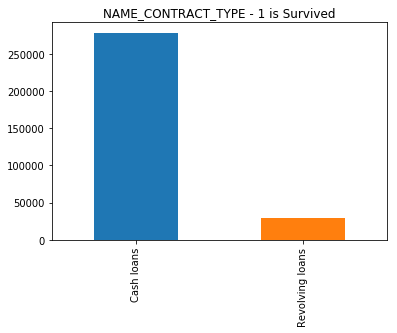

In [51]:
df.NAME_CONTRACT_TYPE.value_counts().plot(kind="bar")
plt.title("NAME_CONTRACT_TYPE - 1 is Survived")
plt.show()

In [52]:

for col in num_cols:
    sns.kdeplot(df[col])
    plt.show()

KeyError: 'FLAG_DOCUMENT_11'

In [ ]:
sns.regplot(x="AMT_INCOME_TOTAL", y="AMT_REQ_CREDIT_BUREAU_YEAR", data=df, fit_reg=False, y_jitter=0.1)

In [ ]:
sns.regplot(x="AMT_CREDIT", y="AMT_REQ_CREDIT_BUREAU_YEAR", data=df, fit_reg=False, y_jitter=0.1)

In [ ]:
sns.violinplot(x="AMT_CREDIT", y="AMT_INCOME_TOTAL", data=df, hue="CODE_GENDER")

In [53]:
import seaborn

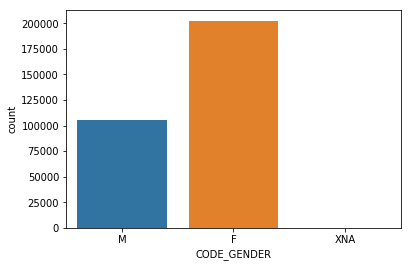

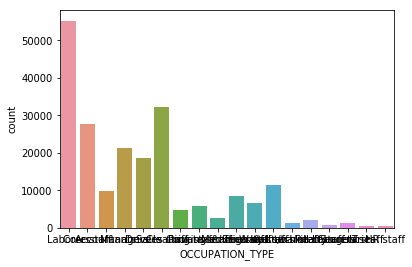

In [54]:
cat_cols = [
    "CODE_GENDER",
    "OCCUPATION_TYPE"
]

for col in cat_cols:
    sns.countplot(col, data=df)
    plt.show()

In [55]:
plt.style.use("seaborn")

In [56]:
plt.show()

In [57]:
df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45


### Visualising affect on Target variable using Proportion Target Positive plots or Kernal Density Estimation (KDE) plots
In order to help us understand the affect an independent variable is having on our target of default or not default, we should ideally visualise the data. A histogram will be dependent on the underlying distribution of the independent variable, i.e. if there are lots of young people in the dataset, then the positive class may appear to be higher in this group simply because there are more of both classes. There are a couple of ways around this which can help us understand the data better.

#### Visualising affect on Target variable using Proportion Target Positive plots or Kernal Density Estimation (KDE) plots¶

### MORE EDA 

STILL LOOKING FOR CATEGORICAL VARIABLES AD TRENDS 

In [ ]:
# define function for plotting categorical bubble charts for remaining variables
def categorical_plot(df, variable):
    
    plt.figure(figsize = (6, 4))
    
    df_high = df[df['TARGET'] == 1].groupby(variable)['TARGET'].agg('count')
    df_var = df.groupby(variable)['TARGET'].agg('count')
    categorical = df_high.divide(df_var, fill_value = 0) * 100

    # Convert back to df
    df_categorical = categorical.to_frame().reset_index().sort_values('TARGET', ascending = True)

    # Create plot in Plotly for interactive visualisation (with some Starling colours)
    ax = df_categorical.plot(x = variable, y = 'TARGET', kind = 'kde', figsize=(6,4), color = 'red')
    ax.set_xlabel('Target: Positive %')
    ax.set_ylabel(variable)
    plt.title('% postive plot for {}'.format(variable.lower()));
    plt.show()
    plt.close()

In [ ]:
# iterate over np.object columns and plot
for column in df.loc[:, df.dtypes == np.object].columns.values:
    categorical_plot(df, column)

#### This agrees with some of the insight we were able to pull from the visualisations. Target correlates perfectly with itself as expected (almost acts as a good check for our code. Then we can see that age has a strong positive correlation, which is actually reversed because age is negative.

We also see that the EXT_SOURCE variables do seem to hold some information that will help us predict the target class.

#### 
Model Fitting
Before doing any feature engineering, lets run a cross validation against the training set. From this we can determine what the benchmark accuracy metrics are for a variety of models. This can help us narrow down which models are performing well on the data.

Our training and test data has already been encoded suring the EDA steps. One final thing to do before passing the train data into a cross validation step would be to scale the numeric quantities, so that features with large values don't get assigned far greater weight in some machine learning algorithms.

In [ ]:
df.shape

### RFE and logistic regression
This is a parallel feature selection. The main goal of this process is to use logistic regression to select 30 features from the dataset according to the importance of the features (features that offer maximum likelihood).

In [ ]:
# checking NAN values
## Data verification
index = []
NaN_counter = []
inf_counter = []

for col in df.columns:
    index.append(col)
    inf_counter.append(np.any(np.isfinite(df[col])))
    NaN_counter.append(np.any(np.isnan(df[col])))

data_check = {'Any_NaN': NaN_counter, 'Any_inf': inf_counter}
data_verification = pd.DataFrame(data=data_check, index=index)
print(data_verification)

In [ ]:
def makeUniPlot(xinput):
    sns.regplot(x=xinput, y="AGE ", data=df, fit_reg=False, y_jitter=0.1, x_jitter=0.1, scatter_kws={"alpha": 0.2})
    plt.show()

In [ ]:
for col in num_cols:
    makeUniPlot(col)

### 3 Feature Engineering
Recall that we can create some binary indicators as well as dummy variables for some of our features. Also, we noted that some numerical variables, like Pclass, really should be converted to a categorical variable

### 4 Feature Selection or Feature Importance

I've done some visual exploration, and I have a sense of which features are good to use. But do they all matter? Should I use all of them? Which ones are the most important?

As is often the case, the answer to these questions is to use some iteration and math!

In [ ]:
df.columns

In [ ]:
features_to_use = [
    "CODE_GENDER",
    "AGE",
    "AMT_INCOME_TOTAL",
    "CNT_CHILDREN",
    "AMT_CREDIT",
    "NAME_INCOME_TYPE",
    "OCCUPATION_TYPE"
]

In [ ]:
X = df[features_to_use]

In [ ]:
y = df[["NAME_CONTRACT_TYPE"]]

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
X_encoded = pd.get_dummies(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
y_train.shape, y_test.shape

In [ ]:
X_train.head()

In [ ]:
# normalize
sds = StandardScaler()
sds.fit(X_train)
X_train = sds.transform(X_train)
X_test = sds.transform(X_test)

In [ ]:
pd.DataFrame(X_train).describe()

In [ ]:
pd.DataFrame(X_test).describe()

In [ ]:
# from sklearn.metrics import roc_auc_score, roc_curve, auc

In [ ]:
for i in range(7):
    
    t0 = time.time()
    clf = DecisionTreeClassifier()
    
    clf.fit(X_train, y_train)
    t1 = time.time()
    
    ypred = clf.predict(X_test)
    scores = roc_auc_score(y_test, ypred)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores}")
    print()
    print("And here are the top features: ")
    c = X_encoded.columns 
    for cfi in zip(c, clf.feature_importances_):
        print(cfi)
    print()
    

In [ ]:
features_to_use = [
    "CODE_GENDER",
    "AGE",
    "AMT_INCOME_TOTAL",
    "CNT_CHILDREN",
    "AMT_CREDIT",
    "NAME_INCOME_TYPE",
    "OCCUPATION_TYPE"
]

### 5 Model Selection, Model Benchmark


In [ ]:
X_encoded[features_to_use].shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded[features_to_use], y, random_state=42)

In [ ]:
df.concat([X_train, y_train], axis=1).head()

In [ ]:
sds = StandardScaler()
sds.fit(X_train)
X_train = sds.transform(X_train)
X_test = sds.transform(X_test)

In [64]:
def modelbench(classifier, X_train, Y_train):
    
    rs = ShuffleSplit(n_splits=3, test_size=.33)
    
    rs.get_n_splits(X_train)
    
    Y_train = Y_train.values
    Y_train = Y_train.ravel()

    for train_idx, test_idx in rs.split(X_train):
        ssX_train, ssX_test = X_train[train_idx], X_train[test_idx]
        ssy_train, ssy_test = Y_train[train_idx], Y_train[test_idx]

        t0 = time.time()
        
        clf = classifier
        clf.fit(X=ssX_train, y=ssy_train)

        ypred = clf.predict(ssX_test)

        scores = roc_auc_score(ssy_test, ypred)
    
        t1 = time.time()
    
        print(f"{classifier} \n took {t1-t0} seconds to run and got a score of {scores}")
        print()

In [65]:
modelbench(DecisionTreeClassifier(), X_train, y_train)

NameError: name 'X_train' is not defined

In [116]:
 sampler = df.imbalance.over_sampling.SMOTE()
 sampler
SMOTE(k=5, kind='regular', m=10, n_jobs=-1, out_step=0.5, random_state=None,
ratio='auto')



AttributeError: 'DataFrame' object has no attribute 'imbalance'

In [ ]:
>>> sampled = df.fit_sample(sampler)
>>> sample